In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=bool)
mask

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 이미지의 픽셀 값을 0~1 사이로 스케일 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 동일합니다.
X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

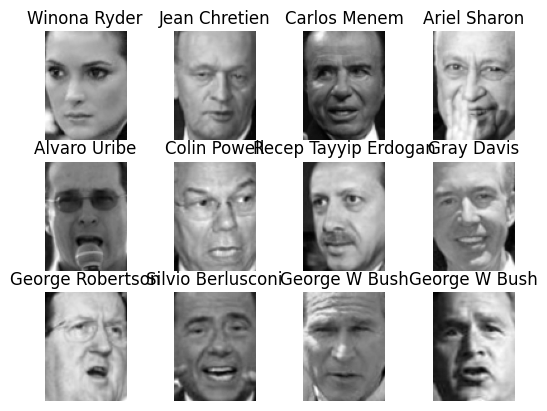

In [2]:
import matplotlib.pyplot as plt


X = people.images
y = people.target
# 클래스 이름(인물 이름)을 변수에 저장
target_names = people.target_names
n_classes = target_names.shape[0]

# 이미지 몇 개 출력하기
fig, ax = plt.subplots(3, 4)
for i in range(12):
    ax[i//4, i%4].imshow(X[i], cmap=plt.cm.gray)
    ax[i//4, i%4].set_title(target_names[y[i]])
    ax[i//4, i%4].axis('off')

plt.show()
# X_train[0]

In [5]:
# pip install mglearn
import mglearn

In [ ]:
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)
# counts = np.bincount(people.target) # 갯수 새기

# for i, (count, names) in enumerate(zip(counts, people.target_names)): # counts와 people.target_names에서 원소 하나씩 할당하여 인덱스 부여

#     print(f'{names:25} {count:3}', end='\t') # names에서 25자리, count에서 3자리, 끝에 탭할당

#     if i % 3 == 0: # 3의 배수

#         print() # 개행



# idx = np.zeros(people.target.shape, dtype=np.bool) # False배열 3023개 설정
# plt.gray() # 그림 흑백
# plt.show()

(87, 65)
Alejandro Toledo           39	
Alvaro Uribe               35	Amelie Mauresmo            21	Andre Agassi               36	
Angelina Jolie             20	Ariel Sharon               77	Arnold Schwarzenegger      42	
Atal Bihari Vajpayee       24	Bill Clinton               29	Carlos Menem               21	
Colin Powell              236	David Beckham              31	Donald Rumsfeld           121	
George Robertson           22	George W Bush             530	Gerhard Schroeder         109	
Gloria Macapagal Arroyo    44	Gray Davis                 26	Guillermo Coria            30	
Hamid Karzai               22	Hans Blix                  39	Hugo Chavez                71	
Igor Ivanov                20	Jack Straw                 28	Jacques Chirac             52	
Jean Chretien              55	Jennifer Aniston           21	Jennifer Capriati          42	
Jennifer Lopez             21	Jeremy Greenstock          24	Jiang Zemin                20	
John Ashcroft              53	John Negroponte     

/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' 

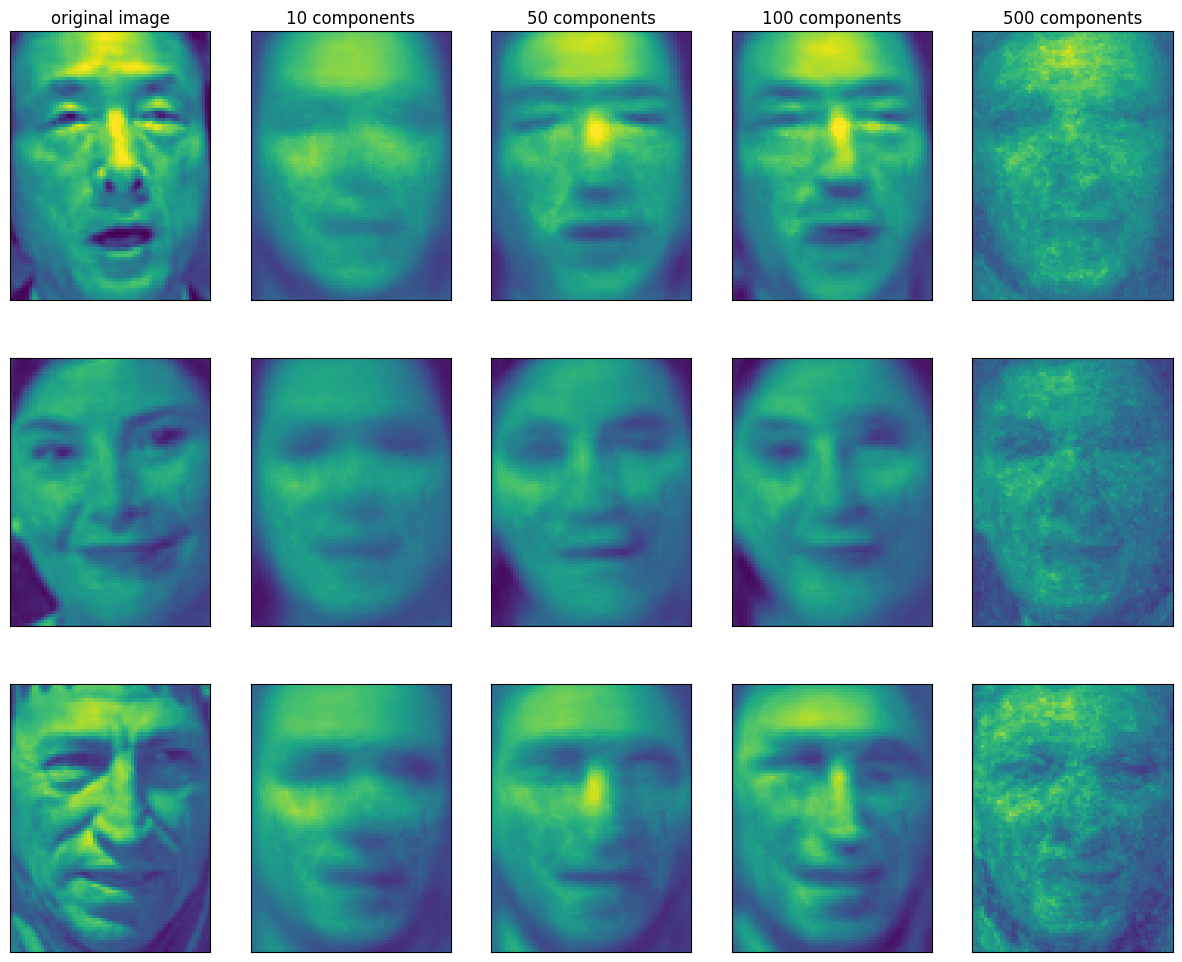

In [10]:
# library import

from sklearn.datasets import fetch_lfw_people
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mglearn

# matplotlib 설정
# matplotlib.rc('font', family='NanumGothic') # 한글 설정
# plt.rcParams['axes.unicode_minus'] = False # 축 -설정



people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, color=False) # 겹치지 않는 최소사람 수, 사이즈비율, 흑백

images_shape = people.images[0].shape # 이미지 한개의 사이즈 저장
print(people.images[0].shape)

counts = np.bincount(people.target) # 갯수 새기
counts
for i, (count, names) in enumerate(zip(counts, people.target_names)): # counts와 people.target_names에서 원소 하나씩 할당하여 인덱스 부여

    print(f'{names:25} {count:3}', end='\t') # names에서 25자리, count에서 3자리, 끝에 탭할당

    if i % 3 == 0: # 3의 배수

        print() # 개행

idx = np.zeros(people.target.shape, dtype=np.bool_) # False배열 3023개 설정
people_target_unq = np.unique(people.target) # target에서 unique값 할당

for target in people_target_unq: # perploe_target_unq에서 원소 하나씩 target에 할당
    idx[np.where(people.target == target)[0][:50]] = 1 # 전체 리스트 3023개에서 target과 일치하는 것의 수가를 50개 까지 True로 변경

x_people = people.data[idx] # 훈련 데이터
y_people = people.target[idx] # 테스트 데이터

# # library import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()

x_people_scaled = scaler.fit_transform(x_people) # 훈련 데이터를 적용하여 전처리

x_train, x_test, y_train, y_test = train_test_split(x_people_scaled, y_people, stratify=y_people, random_state=0, test_size=0.3) # 그룹화할데이터, 랜덤상태, 테스트 비율

mglearn.plots.plot_nmf_faces(x_train, x_test, images_shape)

plt.gray() # 그림 흑백
# plt.show() # 그림 출력

### sklearn.decomposition.NMF
- class sklearn.decomposition.NMF(n_components='warn', *, init=None, solver='cd', beta_loss='frobenius', tol=0.0001, max_iter=200, random_state=None, alpha_W=0.0, alpha_H='same', l1_ratio=0.0, verbose=0, shuffle=False)

/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
/Users/minzy/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minzy/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont

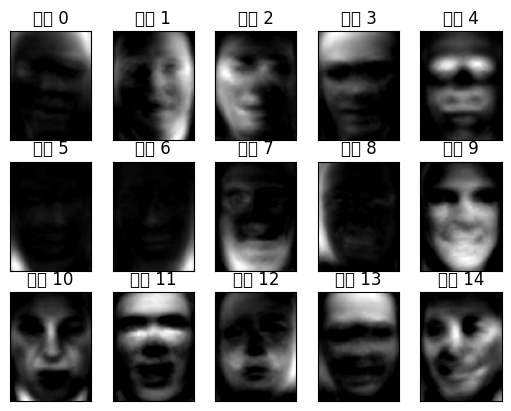

In [11]:
# library import , model 생성 , 학습
from sklearn.decomposition import NMF

# 15 : 특성15개?
nmf = NMF(n_components=15, random_state=0)
nmf.fit(x_train)

# 모델 적용
x_train_nmf = nmf.transform(x_train)
x_test_nmf = nmf.transform(x_test)

nmf.components_.shape
x_train[0].shape

# 시각화
fig, axes = plt.subplots(3, 5, # axes에 plots객체를 3x5 만큼 할당
                         subplot_kw={'xticks':(), 'yticks':()}) # subplot 축 없애기

enumerate(zip(nmf.components_, axes.ravel()))
for i, (comp, ax) in enumerate(zip(nmf.components_, axes.ravel())): # nmf.components_, axes.ravel()에서 하나씩 comp와 ax에 인덱스부여
    # print((comp, ax))
    ax.imshow(comp.reshape(images_shape)) # images_shape= (87, 65)
    # ax.imshow(x_train.reshape(images_shape))
    ax.set_title(f'성분 {i}') # subplot 타이틀

# for i , (picture , ax) in enumerate(zip(x_train, axes.ravel())):
#     ax.imshow(picture.reshape(images_shape))
plt.gray() # 그림 흑백
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split

# 인위적인 사용자-아이템 평가 행렬 생성
# 이 행렬은 보통 사용자가 아이템에 부여한 평점을 나타냅니다.
# 실제 시나리오에서는 데이터베이스에서 이 데이터를 불러와야 합니다.
R = np.array([
    [5, 3, 0, 1],
    [4, 0, 0, 1],
    [1, 1, 0, 5],
    [1, 0, 0, 4],
    [0, 1, 5, 4],
])

n_users, n_items = R.shape
n_components = 2  # 잠재 요인의 수

# NMF 모델 초기화 및 학습
model = NMF(n_components=n_components, init='random', random_state=0)
W = model.fit_transform(R)  # 사용자 특성 행렬
H = model.components_  # 아이템 특성 행렬

# 예측 평점 행렬 생성
R_pred = np.dot(W, H)

# 추천 함수
def recommend_items(user_id, R, R_pred, top_n=2):
    # 사용자가 이미 평가한 아이템 제외
    rated_items = np.where(R[user_id, :] > 0)[0]
    print(rated_items)
    recommendations = R_pred[user_id, :]
    print(recommendations)
    # 이미 평가한 아이템은 추천에서 제외
    recommendations[rated_items] = 0
    print(recommendations)
    # 상위 N개 아이템 추천
    top_n_items = np.argsort(recommendations)[-top_n:][::-1]
    print(top_n_items)
    return top_n_items

# 예시: 0번 사용자에게 아이템 추천
user_id = 0
recommended_items = recommend_items(user_id, R, R_pred, top_n=3)
print(f"사용자 {user_id}에게 추천하는 아이템: {recommended_items}")
W , H







